# Кластеризация и Классификация

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('mall-customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Извлекаем данные из двух последних столбцов

In [13]:
X = df.iloc[:, 3:5].values

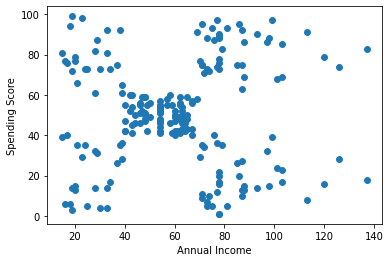

In [15]:
plt.scatter(X.T[0], X.T[1], s = 35)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Используем метод elbow, чтобы определить количество кластеров

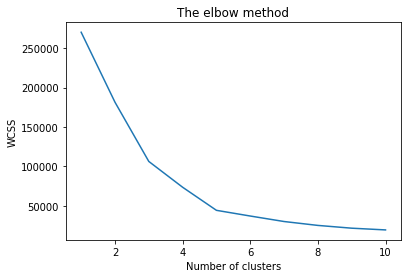

In [16]:
wcss = [] # within cluster sum of squares
for i in range(1, 11):
    kmeans =  KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ - Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided
plt.plot(range(1, 11), wcss)
plt.title("The elbow method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

На графике видно, что после образования пятого кластера, сумма расстояний меняется не сильно. Это означает, что наши данные можно разбить на 5 кластеров

In [19]:
train_data, test_data = train_test_split(X, test_size=0.1)
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
kmeans.fit(train_data)
y = kmeans.predict(test_data)

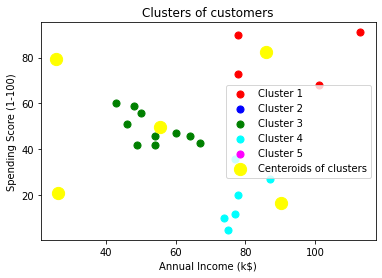

In [21]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta'] # colors for 5 clusters
for i in range(5):
    plt.scatter(test_data[y == i, 0], test_data[y == i, 1], s = 50, c = colors[i], label = f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centeroids of clusters')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Отнесем каждый элемент к ранее определенному классу. 

In [23]:
df['Class'] = kmeans.predict(X)

In [25]:
from sklearn.neighbors import KNeighborsClassifier 

In [55]:
y = df['Class']

In [56]:
knn = KNeighborsClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

knn.fit(X_train, y_train)
res = knn.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error as mse

print(f"Error: {mse(res, y_test)}")

Error: 0.025


Тест показывает, что процент ошибки у построенного классификатора крайне мал. Таким образом, нам удалось определить кластеры на не размеченных данных. И на основе этих классов построить классификатор

## Вывод:

Итого нам удалось построить классификатор на основе алгоритмов машинного обучения. Получая данные, о которых нам мало, что известно, мы сумели построить классификацию на этих данных. Для начала с помощью метода elbow мы получили примерно количество кластеров. С помощью этой инфорации мы обучили модель K-Means, которая сгруппироваала элементы и дала нам возможность составить классы. А на основе полученной информации мы с легкостью построили классификатор на основе алгоритма K-nearest-neightbours